In [306]:
import pandas as pd
import seaborn as sns

from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder

# read the data and store data in DataFrame titled berlin_data
berlin_data = pd.read_csv('listings.csv') 
# print a summary of the data in Melbourne data
berlin_data.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,1.336200e+04,1.336200e+04,1.336200e+04,13353.000000,13353.000000,13362.000000,13362.000000,13362.000000,8397.000000,11221.000000,...,10225.000000,10222.000000,10224.000000,10222.000000,10220.000000,13362.000000,13362.000000,13362.000000,13362.000000,10228.000000
mean,3.102020e+17,2.024032e+13,1.538724e+08,17.868269,20.480341,52.509676,13.402961,2.964826,1.158628,1.344711,...,4.696822,4.825554,4.829555,4.762911,4.653723,10.123485,8.469316,1.381305,0.197800,1.122671
std,4.287225e+17,4.007962e+00,1.747436e+08,78.522773,89.716398,0.033598,0.066296,1.879211,0.444744,0.832744,...,0.402509,0.330470,0.339120,0.328004,0.383122,36.114710,35.698988,5.926579,2.367422,1.788995
min,3.176000e+03,2.024032e+13,1.581000e+03,1.000000,1.000000,52.369040,13.118150,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.010000
25%,1.803007e+07,2.024032e+13,1.391377e+07,1.000000,1.000000,52.490260,13.364565,2.000000,1.000000,1.000000,...,4.580000,4.790000,4.790000,4.670000,4.520000,1.000000,0.000000,0.000000,0.000000,0.130000
50%,4.060840e+07,2.024032e+13,6.387887e+07,1.000000,2.000000,52.509651,13.411290,2.000000,1.000000,1.000000,...,4.820000,4.920000,4.940000,4.850000,4.730000,1.000000,1.000000,0.000000,0.000000,0.500000
75%,7.679724e+17,2.024032e+13,2.667629e+08,4.000000,6.000000,52.532229,13.438257,4.000000,1.000000,2.000000,...,5.000000,5.000000,5.000000,5.000000,4.890000,4.000000,2.000000,1.000000,0.000000,1.510000
max,1.118938e+18,2.024032e+13,5.681830e+08,1153.000000,1304.000000,52.656110,13.721390,16.000000,8.500000,15.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,255.000000,255.000000,51.000000,38.000000,53.030000


In [307]:
# I have selected promising columns according to file "Inside Airbnb Data Dictionary".

col_price=['accommodates', 'amenities', 'availability_30', 'availability_60', 'bedrooms', 
           'beds', 'calculated_host_listings_count', 'calculated_host_listings_count_entire_homes', 
           'calculated_host_listings_count_private_rooms', 'calculated_host_listings_count_shared_rooms', 
           'first_review', 'has_availability', 'host_identity_verified', 'host_is_superhost', 
           'host_listings_count', 'host_total_listings_count', 'instant_bookable', 'maximum_nights', 
           'minimum_nights', 'neighbourhood_group_cleansed', 'price', 'property_type', 
           'review_scores_location', 'review_scores_rating', 'reviews_per_month', 'room_type', 
           'bathrooms_text']

df=berlin_data[col_price]
df.head()


,accommodates,amenities,availability_30,availability_60,bedrooms,beds,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,...,maximum_nights,minimum_nights,neighbourhood_group_cleansed,price,property_type,review_scores_location,review_scores_rating,reviews_per_month,room_type,bathrooms_text
0,4,"[""Hangers"", ""Crib"", ""Smoke alarm"", ""Fire extin...",0,0,1.0,2.0,1,1,0,0,...,184,63,Pankow,$83.00,Entire rental unit,4.92,4.63,0.82,Entire home/apt,1 bath
1,7,"[""Hangers"", ""Smoke alarm"", ""Heating"", ""Luggage...",0,0,4.0,7.0,1,1,0,0,...,14,6,Pankow,$180.00,Entire rental unit,4.86,5.00,0.07,Entire home/apt,2.5 baths
2,1,"[""Hangers"", ""Smoke alarm"", ""Heating"", ""Kitchen...",0,0,0.0,1.0,4,4,0,0,...,1125,150,Pankow,$70.00,Entire rental unit,4.60,4.68,0.16,Entire home/apt,1 bath
3,4,"[""Hangers"", ""Carbon monoxide alarm"", ""Smoke al...",0,0,1.0,1.0,2,2,0,0,...,365,93,Friedrichshain-Kreuzberg,$90.00,Entire condo,4.67,4.72,0.29,Entire home/apt,1 bath
4,2,"[""Hangers"", ""Self check-in"", ""Iron"", ""Heating""...",0,0,0.0,1.0,1,1,0,0,...,365,92,Neukölln,$25.00,Entire rental unit,4.87,4.77,1.74,Entire home/apt,1 bath


In [308]:
# Let's check data types.
df.dtypes.value_counts()

object     11
int64       9
float64     7
Name: count, dtype: int64

Let's have another look at data with a heatmap?

In [309]:
#To check if we can find something interesting through heat map first drop some repetitive columns.
df0=berlin_data.select_dtypes(include='number')
df0=df0.drop(['id', 'scrape_id', 'host_id', 'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'calculated_host_listings_count_entire_homes', 'calculated_host_listings_count_private_rooms', 'calculated_host_listings_count_shared_rooms'],axis=1)
df0.dtypes

host_listings_count               float64
host_total_listings_count         float64
latitude                          float64
longitude                         float64
accommodates                        int64
bathrooms                         float64
bedrooms                          float64
beds                              float64
minimum_nights                      int64
maximum_nights                      int64
calendar_updated                  float64
availability_30                     int64
availability_60                     int64
availability_90                     int64
availability_365                    int64
number_of_reviews                   int64
number_of_reviews_ltm               int64
number_of_reviews_l30d              int64
review_scores_rating              float64
calculated_host_listings_count      int64
reviews_per_month                 float64
dtype: object

c:\Users\irve8\anaconda3\envs\Udacity\lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


(13362, 21)

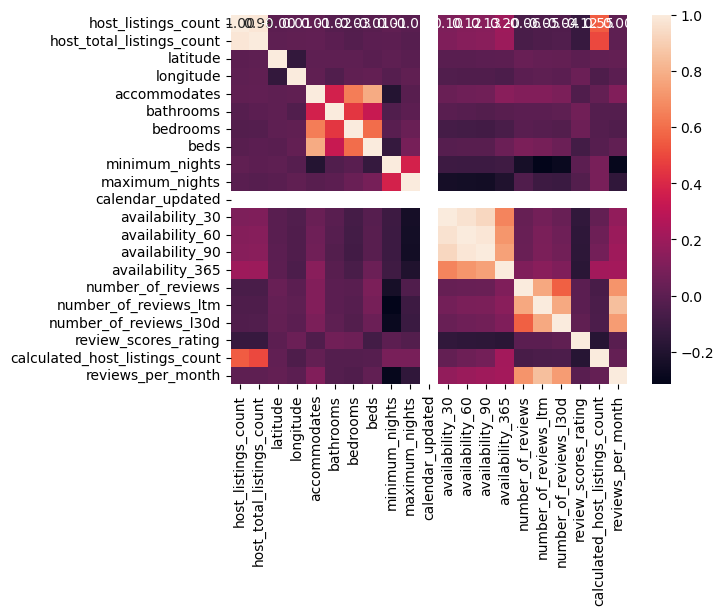

In [310]:
sns.heatmap(df0.corr(), annot=True, fmt=".2f");
df0.shape

I haven't found any suprising correlation.For example we could expect that "accommodates" and "bedrooms" are going to be correlated.

Now we will clean the data.

In [311]:
#We will drop all rows with missing price in our main data frame.
df=df.dropna(subset = ['price'])
df.shape

(8400, 27)

In [312]:
#Let's check in which columns we are missing over 20% of data.
df.columns[df.isna().sum()/df.shape[0]>0.2]

Index(['first_review', 'review_scores_location', 'review_scores_rating',
       'reviews_per_month'],
      dtype='object')

In [313]:
# We will drop those less promising.
df = df.drop(columns=['first_review', 'review_scores_location', 'reviews_per_month'])
df.shape

(8400, 24)

In [314]:
#We will check the percentage of NaN values in our data frame.
df[df.columns[df.isna().sum()/df.shape[0]>0]].isna().sum()/df.shape[0]

bedrooms                0.000595
beds                    0.000952
has_availability        0.010952
host_is_superhost       0.001786
review_scores_rating    0.237976
bathrooms_text          0.000595
dtype: float64

In [315]:
# we will fill missing data in numeric columns with mean.
num_vars = df.select_dtypes(include=['float', 'int']).columns
for col in num_vars:
    df[col].fillna((df[col].mean()), inplace=True)
#We will check again the percentage of NaN values in our data frame.
df[df.columns[df.isna().sum()/df.shape[0]>0]].isna().sum()/df.shape[0]


has_availability     0.010952
host_is_superhost    0.001786
bathrooms_text       0.000595
dtype: float64

In [316]:
# 'bathrooms_text' contains categorical variable therefore we will use mode to fill missing data.
df['bathrooms_text'] = df['bathrooms_text'].fillna(df['bathrooms_text'].mode()[0]) 

# For 'has_availability' and 'host_is_superhost' columns I have decided to fill with 'f'
# as it seems to be more likely to be the right one.
df['has_availability'] = df['has_availability'].fillna('f') 
df['host_is_superhost'] = df['host_is_superhost'].fillna('f')

#We will check again the procentage of NaN values in our data frame.
df[df.columns[df.isna().sum()/df.shape[0]>0]].isna().sum()/df.shape[0]

Series([], dtype: float64)

In [317]:
# Let's check cardinality in categorical columns
fc = lambda c : df[c].name +'-'+ str(df[c].unique().size)
ile= [fc(col) for col in df.columns if df[col].dtype == "object"]
ile

['amenities-7569',
 'has_availability-2',
 'host_identity_verified-2',
 'host_is_superhost-2',
 'instant_bookable-2',
 'neighbourhood_group_cleansed-12',
 'price-497',
 'property_type-61',
 'room_type-4',
 'bathrooms_text-24']

In [318]:
# Let's see what we have inside.
df['property_type'].unique()

array(['Entire rental unit', 'Entire condo', 'Entire loft', 'Entire home',
       'Private room in rental unit', 'Entire guest suite',
       'Private room in loft', 'Private room', 'Entire townhouse',
       'Private room in home', 'Private room in hostel',
       'Shared room in hostel', 'Private room in condo', 'Entire place',
       'Entire guesthouse', 'Houseboat',
       'Private room in casa particular', 'Shared room in rental unit',
       'Entire bungalow', 'Entire cottage', 'Entire villa',
       'Entire serviced apartment', 'Room in boutique hotel', 'Boat',
       'Tiny home', 'Private room in townhouse',
       'Private room in bed and breakfast', 'Private room in villa',
       'Room in hostel', 'Private room in guest suite',
       'Room in serviced apartment', 'Room in aparthotel',
       'Private room in cave', 'Room in hotel', 'Entire vacation home',
       'Private room in pension', 'Private room in serviced apartment',
       'Shared room in boutique hotel', 'Private

In [319]:
df['room_type'].unique()

array(['Entire home/apt', 'Private room', 'Shared room', 'Hotel room'],
      dtype=object)

In [320]:
# We will remove 'property_type' column as 'room_type' seems to contain enough information.
df = df.drop(columns=['property_type'])

In [321]:
# let's check the data.
df['amenities'].unique()

array(['["Hangers", "Crib", "Smoke alarm", "Fire extinguisher", "Iron", "Self check-in", "Lockbox", "Heating", "Kitchen", "Coffee maker", "Hair dryer", "Essentials", "Washer", "Cooking basics", "Patio or balcony", "Private hot tub", "Shampoo", "First aid kit", "Carbon monoxide alarm", "Wifi"]',
       '["Hangers", "Smoke alarm", "Heating", "Luggage dropoff allowed", "Coffee maker", "Elevator", "Children\\u2019s books and toys", "High chair", "Iron", "Kitchen", "Dishes and silverware", "Paid parking off premises", "Bathtub", "Hot water", "Babysitter recommendations", "Wifi", "Pack \\u2019n play/Travel crib", "Microwave", "Refrigerator", "Essentials", "Washer", "TV with standard cable", "Bed linens", "Crib", "Dishwasher", "Dryer", "Stove", "Hair dryer", "Room-darkening shades", "Cooking basics", "Oven", "Children\\u2019s dinnerware"]',
       '["Hangers", "Smoke alarm", "Heating", "Kitchen", "Coffee maker", "Refrigerator", "Dishes and silverware", "Ethernet connection", "Washer", "Host g

In [322]:
# As we would have to create to many columns to use it and the informations doesn't seems 
# to be very useful we will drop it.
df = df.drop(columns=['amenities'])

In [323]:
# Let's check bathrooms.
df['bathrooms_text'].unique()

array(['1 bath', '2.5 baths', '2 baths', '1.5 baths', '1 private bath',
       '1 shared bath', '1.5 shared baths', '2 shared baths', '0 baths',
       '0 shared baths', '3 baths', '4.5 baths', '3.5 baths', '5 baths',
       '8.5 baths', '2.5 shared baths', 'Half-bath', '4 shared baths',
       '6 shared baths', '4 baths', '3 shared baths', '8.5 shared baths',
       '6 baths', 'Shared half-bath'], dtype=object)

In [324]:
# This function will be used to convert 'bathrooms_text' to ordinal values.
# 0 - no bathrooms
# 1 - shared bathroom/s
# 2 - privat half batroom
# 3 - private bathroom/s
def bath (x):
    """Convert 'bathrooms_text' column to ordinal values.

    INPUT:
    Text from column 'bathrooms_text'.

    OUTPUT:
    Below you can see "ordinal value - string found"
    0 - no bathrooms
    1 - shared bathroom/s
    2 - privat half batroom
    3 - private bathroom/s 
    """
    
    if '0' in x:
        x=0
    elif 'shared' in x:
        x=1
    elif 'Half' in x:
        x=2
    else:
        x=3
    return x

# Let's apply the function.
df['bathrooms_text_ord']=df['bathrooms_text'].apply(bath)
# We will drop original column.
df=df.drop('bathrooms_text',axis=1)
# How it looks now?
df.loc[60:70,'bathrooms_text_ord']


60    3
61    3
62    1
64    3
65    3
66    3
68    3
69    3
Name: bathrooms_text_ord, dtype: int64

In [325]:
# Let's check below columns.
df[['has_availability','host_identity_verified','host_is_superhost','instant_bookable']]

,has_availability,host_identity_verified,host_is_superhost,instant_bookable
0,t,t,f,f
1,t,t,f,f
2,t,t,t,f
3,t,t,f,f
4,t,t,t,f
...,...,...,...,...
13357,t,t,f,f
13358,t,t,f,f
13359,t,t,f,t
13360,t,t,f,f


In [326]:
# We will convert categorical  t/f to bool values.
bools=['has_availability','host_identity_verified','host_is_superhost','instant_bookable']
for col in bools:
    df[col]=df[col].apply(lambda x: x=='t')
df[bools].head()

,has_availability,host_identity_verified,host_is_superhost,instant_bookable
0,True,True,False,False
1,True,True,False,False
2,True,True,True,False
3,True,True,False,False
4,True,True,True,False


In [327]:
# Let's check 'price' column
df['price'].head()

0     $83.00
1    $180.00
2     $70.00
3     $90.00
4     $25.00
Name: price, dtype: object

In [328]:
# We will convert text to number.
df['price']=df['price'].apply(lambda x: x.replace('$',''))
df['price']=df['price'].apply(lambda x: float(x.replace(',','')))
df['price'].head()

0     83.0
1    180.0
2     70.0
3     90.0
4     25.0
Name: price, dtype: float64

Now we can analize the data a bit deeper and answer our first question.

1. What is the average price in each Berlin's district?

In [329]:
# We will create bar plot functions for our purpose.
def bars (x):
    """ The function will create a bar plot

    Input: Series
    Output:Bar plot with values on X axis and indexes on Y axis
    """
    indeksy=x.index
    wartosci=x.values
    sns.barplot(x=wartosci, y=indeksy)

def bars2 (x):
    """ The function will create a bar plot

    Input: Series
    Output:Bar plot with values on Y axis and indexes on X axis
    """
    indeksy=x.index
    wartosci=x.values
    sns.barplot(x=indeksy, y=wartosci)

c:\Users\irve8\anaconda3\envs\Udacity\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\irve8\anaconda3\envs\Udacity\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\irve8\anaconda3\envs\Udacity\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


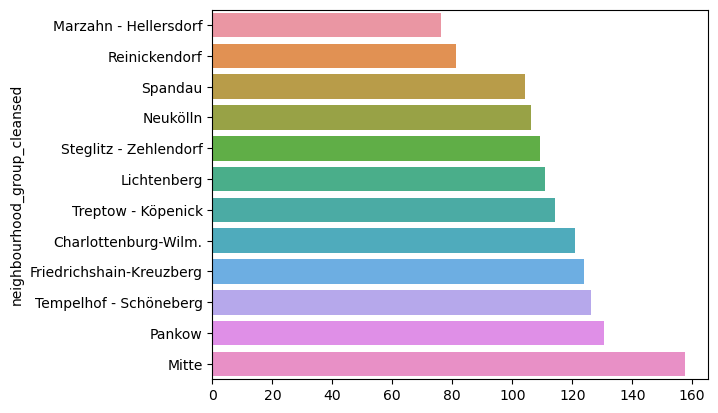

In [330]:
#Let's display a bar plot of average price in each Berlin's district.
#x=df.groupby('neighbourhood_group_cleansed').price.mean().sort_values()
bars(df.groupby('neighbourhood_group_cleansed').price.mean().sort_values())

As we can see the most expensive district is Mitte and the affordable are Marzan-Hellersdorf and Reinickendorf.

Still some data wrangling has to be done.

In [331]:
# Let's check the cardinality of leftover categorical columns
ile= [fc(col) for col in df.columns if df[col].dtype == "object"]
ile

['neighbourhood_group_cleansed-12', 'room_type-4']

In [332]:
# Let's look inside.
df['room_type'].unique()

array(['Entire home/apt', 'Private room', 'Shared room', 'Hotel room'],
      dtype=object)

In [333]:
# For 'room_type' we will go with ordinal encoding. 
typ=['Shared room','Hotel room','Private room','Entire home/apt']
#-from sklearn.preprocessing import OrdinalEncoder
ord_enc=OrdinalEncoder(categories=[typ])
df[['room_type_ord']]=ord_enc.fit_transform(df[['room_type']])
df=df.drop('room_type', axis=1)
df['room_type_ord'].unique()

array([3., 2., 0., 1.])

In [334]:
# For 'neighbourhood_group_cleansed' I've decided to go with one hot shoe encoding.
#-from sklearn.preprocessing import OneHotEncoder
df_dumm=pd.get_dummies(df['neighbourhood_group_cleansed'], prefix='neighbourhood_group_cleansed', prefix_sep='_', drop_first=True, dummy_na=True)
df = pd.concat([df.drop('neighbourhood_group_cleansed', axis=1), df_dumm], axis=1)
# How does it look like now?
df

,accommodates,availability_30,availability_60,bedrooms,beds,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,has_availability,...,neighbourhood_group_cleansed_Marzahn - Hellersdorf,neighbourhood_group_cleansed_Mitte,neighbourhood_group_cleansed_Neukölln,neighbourhood_group_cleansed_Pankow,neighbourhood_group_cleansed_Reinickendorf,neighbourhood_group_cleansed_Spandau,neighbourhood_group_cleansed_Steglitz - Zehlendorf,neighbourhood_group_cleansed_Tempelhof - Schöneberg,neighbourhood_group_cleansed_Treptow - Köpenick,neighbourhood_group_cleansed_nan
0,4,0,0,1.0,2.0,1,1,0,0,True,...,False,False,False,True,False,False,False,False,False,False
1,7,0,0,4.0,7.0,1,1,0,0,True,...,False,False,False,True,False,False,False,False,False,False
2,1,0,0,0.0,1.0,4,4,0,0,True,...,False,False,False,True,False,False,False,False,False,False
3,4,0,0,1.0,1.0,2,2,0,0,True,...,False,False,False,False,False,False,False,False,False,False
4,2,0,0,0.0,1.0,1,1,0,0,True,...,False,False,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13357,10,26,53,3.0,1.0,1,1,0,0,True,...,False,False,False,False,False,False,False,False,False,False
13358,2,0,12,1.0,0.0,1,0,1,0,True,...,False,False,False,False,False,False,False,False,True,False
13359,2,30,60,1.0,0.0,1,1,0,0,True,...,False,False,False,False,False,False,False,False,False,False
13360,6,29,59,2.0,1.0,1,1,0,0,True,...,False,False,False,False,True,False,False,False,False,False


In [335]:
# Double check columns.
df.columns

Index(['accommodates', 'availability_30', 'availability_60', 'bedrooms',
       'beds', 'calculated_host_listings_count',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms', 'has_availability',
       'host_identity_verified', 'host_is_superhost', 'host_listings_count',
       'host_total_listings_count', 'instant_bookable', 'maximum_nights',
       'minimum_nights', 'price', 'review_scores_rating', 'bathrooms_text_ord',
       'room_type_ord',
       'neighbourhood_group_cleansed_Friedrichshain-Kreuzberg',
       'neighbourhood_group_cleansed_Lichtenberg',
       'neighbourhood_group_cleansed_Marzahn - Hellersdorf',
       'neighbourhood_group_cleansed_Mitte',
       'neighbourhood_group_cleansed_Neukölln',
       'neighbourhood_group_cleansed_Pankow',
       'neighbourhood_group_cleansed_Reinickendorf',
       'neighbourhood_group_cleansed_Spandau',
       'neighbourhood_gro

Now we can take care on our second question.
2. What have the biggest influence on the price of listing.To help you asses what type of property is right to invest in.

In [336]:
# Let's look at correlation coeficients.
cof=df.corr()
cof.price.abs().sort_values(ascending=False)

price                                                    1.000000
accommodates                                             0.455022
bedrooms                                                 0.392721
beds                                                     0.330030
bathrooms_text_ord                                       0.201722
room_type_ord                                            0.200070
minimum_nights                                           0.154962
neighbourhood_group_cleansed_Mitte                       0.128721
calculated_host_listings_count_private_rooms             0.103329
instant_bookable                                         0.099032
availability_60                                          0.080165
availability_30                                          0.072755
neighbourhood_group_cleansed_Neukölln                    0.054009
host_is_superhost                                        0.052717
review_scores_rating                                     0.051774
neighbourh

We can conculde that the biggest influence on the price has the size of property. As we also know 4 first ones are of course correlated with each other.

c:\Users\irve8\anaconda3\envs\Udacity\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\irve8\anaconda3\envs\Udacity\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\irve8\anaconda3\envs\Udacity\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


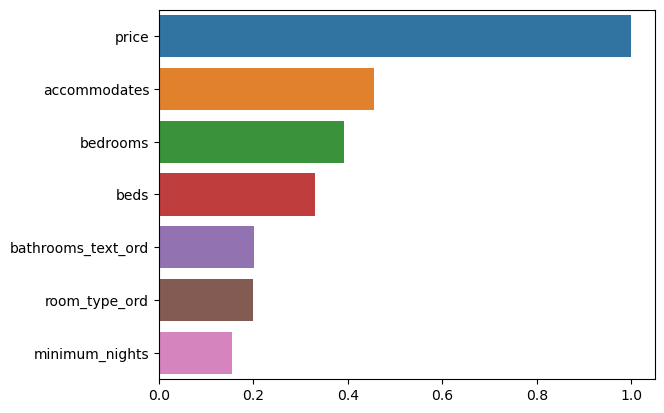

In [337]:
bars(cof.price.abs().sort_values(ascending=False).head(7))

In [338]:
# Now let's see what has the highest positive correlation.
cof.price.sort_values(ascending=False)

price                                                    1.000000
accommodates                                             0.455022
bedrooms                                                 0.392721
beds                                                     0.330030
bathrooms_text_ord                                       0.201722
room_type_ord                                            0.200070
neighbourhood_group_cleansed_Mitte                       0.128721
instant_bookable                                         0.099032
availability_60                                          0.080165
availability_30                                          0.072755
host_is_superhost                                        0.052717
review_scores_rating                                     0.051774
maximum_nights                                           0.020477
host_total_listings_count                                0.019965
has_availability                                         0.014880
host_listi

It looks like the highest positive correlations are also the higest absolute correlations.

c:\Users\irve8\anaconda3\envs\Udacity\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\irve8\anaconda3\envs\Udacity\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\irve8\anaconda3\envs\Udacity\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


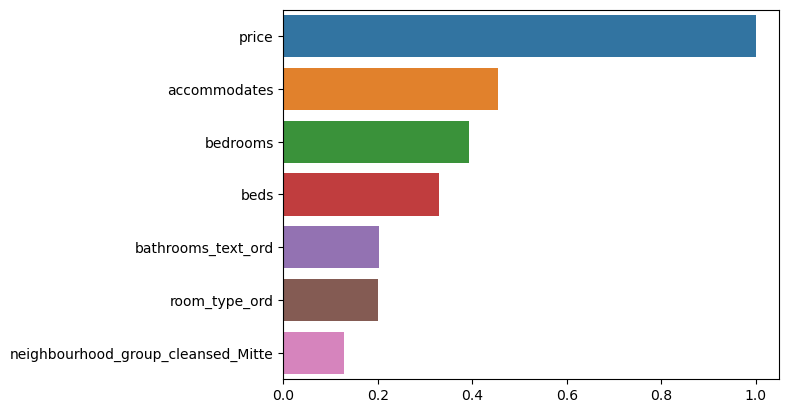

In [339]:
bars(cof.price.sort_values(ascending=False).head(7))

Do you want to see Berlin from Reichtag Dome?
3. What to look for if you are trying to find affordable stay in Berlin.

In [340]:
# Now we will check the highest negative correlation.
cof.price.sort_values(ascending=True)

minimum_nights                                          -0.154962
calculated_host_listings_count_private_rooms            -0.103329
neighbourhood_group_cleansed_Neukölln                   -0.054009
neighbourhood_group_cleansed_Reinickendorf              -0.049608
neighbourhood_group_cleansed_Marzahn - Hellersdorf      -0.045366
calculated_host_listings_count_shared_rooms             -0.036739
neighbourhood_group_cleansed_Steglitz - Zehlendorf      -0.027435
neighbourhood_group_cleansed_Treptow - Köpenick         -0.024496
neighbourhood_group_cleansed_Lichtenberg                -0.023641
neighbourhood_group_cleansed_Spandau                    -0.022846
neighbourhood_group_cleansed_Friedrichshain-Kreuzberg   -0.017900
calculated_host_listings_count                          -0.016258
neighbourhood_group_cleansed_Tempelhof - Schöneberg     -0.004710
calculated_host_listings_count_entire_homes             -0.000118
neighbourhood_group_cleansed_Pankow                      0.008015
host_ident

It looks like if you want spare some money on accomodation in Berlin it's good to look for listing with 'minimum nights' restriction. We can also observe that hosts who rent more properties tend to set the price lower. As we could already see before, choosing the right district also can help to get lower price.

c:\Users\irve8\anaconda3\envs\Udacity\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\irve8\anaconda3\envs\Udacity\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\irve8\anaconda3\envs\Udacity\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


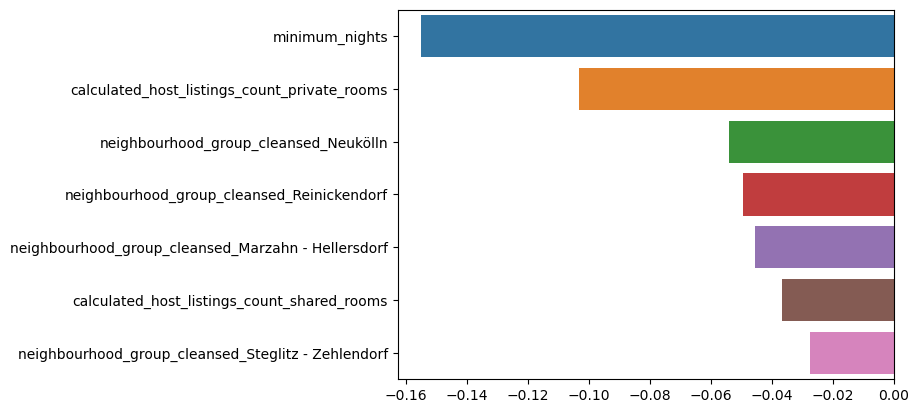

In [341]:
bars(cof.price.sort_values(ascending=True).head(7))

In [342]:
#cos zrobic z kolumna
#neighbourhood_group_cleansed_nan                              NaN
#nie moze byc wypelniona nan

Let's answer our next question.
4. What effect on the price has the date of listing

In [343]:
# We will load data showing prices of listings for individual days.
dfc = pd.read_csv('calendar.csv') 
dfc.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,265408,2024-03-25,t,$20.00,NaN,1,7
1,265408,2024-03-26,t,$20.00,NaN,1,7
2,265408,2024-03-27,t,$20.00,NaN,1,7
3,265408,2024-03-28,t,$20.00,NaN,1,7
4,265408,2024-03-29,t,$20.00,NaN,1,7


In [344]:
# We will convert text to number.
dfc['price']=dfc['price'].apply(lambda x: x.replace('$',''))
dfc['price']=dfc['price'].apply(lambda x: float(x.replace(',','')))
dfc['price'].mean()

136.65695078298035

In [345]:
# Let's check data types
dfc.dtypes

listing_id          int64
date               object
available          object
price             float64
adjusted_price    float64
minimum_nights      int64
maximum_nights      int64
dtype: object

In [346]:
# Converts text in 'date' column to datetime and creates an additional 'month' column.
dfc['date']=pd.to_datetime(dfc['date'])
dfc['month'] = dfc['date'].dt.month
# Let's see mean price per month
dfc.groupby('month').price.mean()

month
1     136.657012
2     136.657012
3     136.656287
4     136.657012
5     136.657012
6     136.657012
7     136.657012
8     136.657012
9     136.657012
10    136.657012
11    136.657012
12    136.657012
Name: price, dtype: float64

We can see that the price is not fluctuating with months.

c:\Users\irve8\anaconda3\envs\Udacity\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\irve8\anaconda3\envs\Udacity\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\irve8\anaconda3\envs\Udacity\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


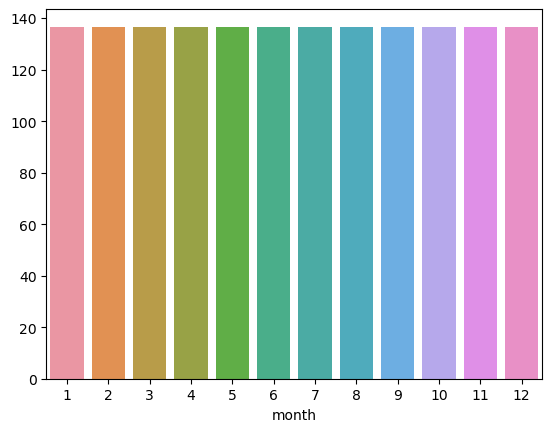

In [347]:
bars2(dfc.groupby('month').price.mean())

In [348]:
# Let's check if the price changes depending on the day of the week. 
dfc['weekday'] = dfc['date'].dt.weekday
dfc.groupby('weekday').price.mean()

weekday
0    136.706734
1    136.657012
2    136.657012
3    136.657012
4    136.657012
5    136.656895
6    136.606153
Name: price, dtype: float64

It looks that the price is not calendar date dependent in analyzed data.

c:\Users\irve8\anaconda3\envs\Udacity\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\irve8\anaconda3\envs\Udacity\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\irve8\anaconda3\envs\Udacity\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


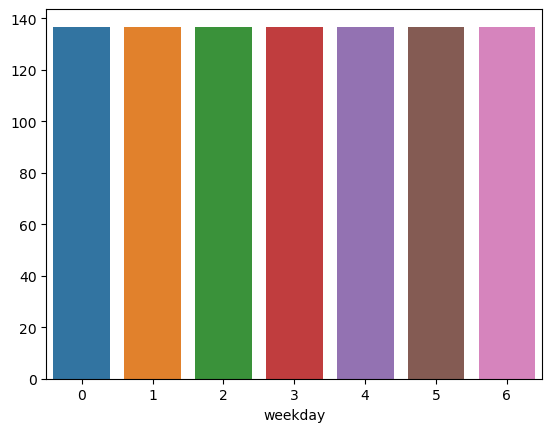

In [349]:
bars2(dfc.groupby('weekday').price.mean())

As our last task...
5. To create a model to help you to predict rent price of your real estate.

In [350]:
# We will make train/test split, predict and score the model.
###???from sklearn.tree import DecisionTreeRegressor
###???from sklearn.ensemble import RandomForestRegressor
###??? from xgboost import XGBRegressor
#-from sklearn.metrics import r2_score
def spl_pred (df):
    #-from sklearn.model_selection import train_test_split
    #-from sklearn.linear_model import LinearRegression
    X = df.drop(['price'], axis=1)
    y = df['price']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state=42)
    X_train.shape
    X_test.shape
    lm_model = LinearRegression() # Instantiate
    lm_model.fit(X_train, y_train) #Fit
    #Predict and score the model
    y_test_preds = lm_model.predict(X_test) 
    return "The r-squared score for your model was {} on {} values.".format(r2_score(y_test, y_test_preds), len(y_test))
spl_pred (df)

'The r-squared score for your model was 0.3449827333702037 on 2520 values.'